#### Linear data
- logistic regression 
- support vector machine

#### Non linear data
- Decision tree
- Random Forest
- Naive Bayes Classifier

In [ ]:
Decision Tree(used for both regression and classifiation)
- ID3 Algoritm
- uses entropy --->the feature which has the lowest entropy value
- information gain--->difference b/w entropy before and after splitting
CART Algorithm
- uses gini index--->the feature which has he higest entropy value will selected to split

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
import pandas as pd
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["Target"]=iris.target

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Traget
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [19]:
x=iris_df.iloc[:,0:4]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y=iris_df["Target"]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [55]:
x_train.shape

(135, 4)

In [56]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
56,6.3,3.3,4.7,1.6
104,6.5,3.0,5.8,2.2
69,5.6,2.5,3.9,1.1
55,5.7,2.8,4.5,1.3
132,6.4,2.8,5.6,2.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [57]:
x_test.shape

(15, 4)

In [58]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [59]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

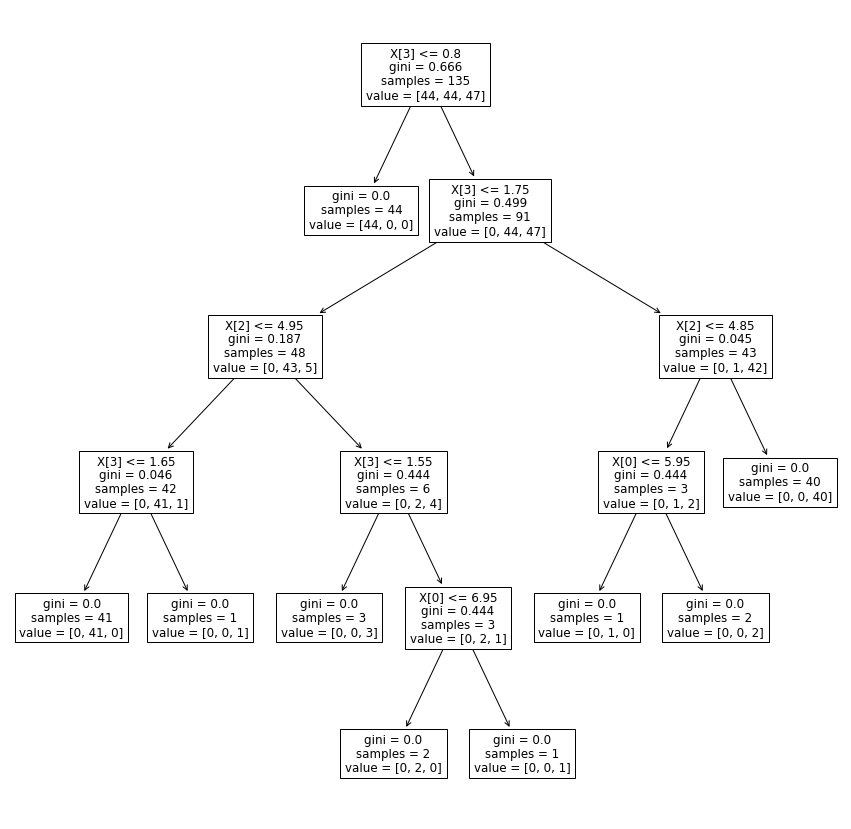

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [62]:
y_pred=model.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
accuracy_score(y_test,y_pred)

1.0

In [64]:
y_pred1=model.predict(x_train)

In [66]:
accuracy_score(y_train,y_pred1)

1.0

In [67]:
confusion_matrix(y_test,y_pred)

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]], dtype=int64)

In [70]:
precision_score(y_test,y_pred,average='weighted')

1.0

In [69]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

In [72]:
recall_score(y_test,y_pred,average="weighted")

1.0

actual values=[dog,cat,dog,dog,cat]
prd values=[cat,cat,dog,cat,cat]

           actual values
          dog       cat
        
pred
dog      1(correct)    0(incorrect)

cat      2(incorrect)  2(correct)

In [ ]:
10 
9---apple
1--mango
----imbalanced dataset

150
50-setosa
50-versi color
50-virginica
----balanced dataset


precision 
recall

cancer data
         (1)     (0)
(1)       1      2(fp)

(0)       10(fn)  11

